In [1]:
from torchvision.models import AlexNet_Weights
from datetime import datetime

import numpy as np
import torch
from torch.utils.data import DataLoader, SubsetRandomSampler, Subset

from datasets.CustomTrainingImageDataset import generate_balanced_dataset
from models.cnn import CnnModel
from train import train_classifier
from utils import plot_model_metrics

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

batch_size = 512

train_dataset, test_dataset = generate_balanced_dataset('data/DeepHP')
train_loader = DataLoader(train_dataset,
                          batch_size=batch_size,
                          shuffle=True, )
test_loader = DataLoader(test_dataset,  #Subset(test_dataset, np.arange(100)),
                         batch_size=batch_size,
                         shuffle=True,
                         )

model = torch.load("./alexnet-checkpoint-epoch-7.pickle")#CnnModel()

#CnnModel()
print(model)


cuda:0
CnnModel(
  (model): Sequential(
    (0): Conv2d(3, 3, kernel_size=(1, 1), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(3, 3, kernel_size=(1, 1), stride=(1, 1))
    (3): ReLU()
    (4): Conv2d(3, 16, kernel_size=(7, 7), stride=(1, 1), padding=valid)
    (5): ReLU()
    (6): Conv2d(16, 16, kernel_size=(5, 5), stride=(1, 1), padding=valid)
    (7): ReLU()
    (8): Conv2d(16, 16, kernel_size=(3, 3), stride=(3, 3), padding=valid)
    (9): ReLU()
    (10): Conv2d(16, 16, kernel_size=(3, 3), stride=(3, 3), padding=valid)
    (11): ReLU()
    (12): Conv2d(16, 16, kernel_size=(3, 3), stride=(3, 3), padding=valid)
    (13): ReLU()
    (14): Flatten(start_dim=1, end_dim=-1)
    (15): Linear(in_features=1296, out_features=200, bias=True)
    (16): ReLU()
    (17): Linear(in_features=200, out_features=50, bias=True)
    (18): ReLU()
    (19): Linear(in_features=50, out_features=1, bias=True)
  )
)


In [2]:
print(f"Training starts {datetime.now().isoformat()}")

Training starts 2024-08-13T13:00:35.088612


In [3]:

model = model.to(device)
model, model_metrics = train_classifier(model, train_loader, test_loader, device,
                                        learning_rate=0.001,
                                        weight_decay=0.0001,
                                        max_epochs=50,
                                        checkpoint_every=1,
                                        eval_every=5)

Epoch 1 testing: 100%|██████████| 232/232 [03:44<00:00,  1.03it/s]


1/50: accuracy:0.72, loss:0.69, precision:0.00, recall:0.72, f1:0.00, epoch:0.00


Epoch 6 testing: 100%|██████████| 232/232 [02:13<00:00,  1.73it/s]


6/50: accuracy:0.72, loss:0.69, precision:0.00, recall:0.72, f1:0.00, epoch:5.00


Epoch 11 testing: 100%|██████████| 232/232 [02:13<00:00,  1.74it/s]


11/50: accuracy:0.28, loss:0.70, precision:0.28, recall:0.28, f1:0.44, epoch:10.00


Epoch 16 testing: 100%|██████████| 232/232 [02:11<00:00,  1.76it/s]


16/50: accuracy:0.28, loss:0.69, precision:0.28, recall:0.28, f1:0.44, epoch:15.00


Epoch 21 testing: 100%|██████████| 232/232 [02:16<00:00,  1.69it/s]


21/50: accuracy:0.72, loss:0.69, precision:0.00, recall:0.72, f1:0.00, epoch:20.00


Epoch 26 testing: 100%|██████████| 232/232 [02:12<00:00,  1.76it/s]


26/50: accuracy:0.72, loss:0.69, precision:0.00, recall:0.72, f1:0.00, epoch:25.00


Epoch 31 testing: 100%|██████████| 232/232 [02:12<00:00,  1.75it/s]


31/50: accuracy:0.72, loss:0.69, precision:0.00, recall:0.72, f1:0.00, epoch:30.00


Epoch 36 testing: 100%|██████████| 232/232 [02:10<00:00,  1.78it/s]


36/50: accuracy:0.28, loss:0.69, precision:0.28, recall:0.28, f1:0.44, epoch:35.00


Epoch 41 testing: 100%|██████████| 232/232 [02:18<00:00,  1.67it/s]


41/50: accuracy:0.28, loss:0.69, precision:0.28, recall:0.28, f1:0.44, epoch:40.00


Epoch 46 testing: 100%|██████████| 232/232 [02:12<00:00,  1.75it/s]


46/50: accuracy:0.72, loss:0.69, precision:0.00, recall:0.72, f1:0.00, epoch:45.00


Epoch 50 training: 100%|██████████| 304/304 [03:06<00:00,  1.63it/s]


Training ends 2024-08-13T16:01:38.938100
Test accuracy: 0.7188545382856963
Test precision: 0.0
Test recall: 0.7188545382856963
Test f1: 0.0


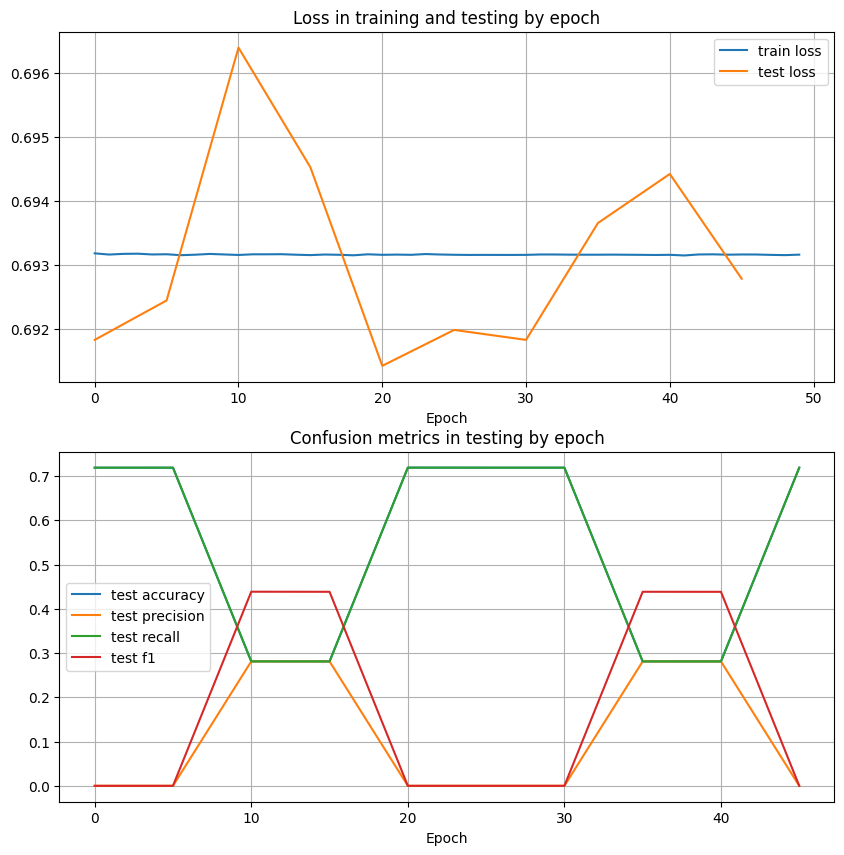

In [4]:
print(f"Training ends {datetime.now().isoformat()}")
for metric in ["accuracy", "precision", "recall", "f1"]:
    if len(model_metrics[f"test_{metric}"]) > 0:
        print(f"Test {metric}:", model_metrics[f"test_{metric}"][-1])

plot_model_metrics(model_metrics)

In [5]:

torch.save(model.state_dict(), "./model5.bin")


In [6]:
print(model_metrics)

{'train_accuracy': [0.49938722130847946, 0.4985493382980019, 0.49953475268031194, 0.4996770014772174, 0.4986964413529483, 0.4995910525554338, 0.5009176451327972, 0.49912180761147656, 0.49643892581932264, 0.5003779658564815, 0.5008369787859405, 0.4988182737116228, 0.4975417466191521, 0.49919757210952725, 0.499268482349537, 0.5008555867750974, 0.4991993329678363, 0.49990696005421537, 0.5001856515746832, 0.5004833794011939, 0.4998892562895955, 0.49954669796235374, 0.49986574645163256, 0.4974345246253655, 0.49834817213389376, 0.499739440561038, 0.5012592516447368, 0.4985918844420078, 0.4993778935185185, 0.5007616426047757, 0.4993278280336258, 0.4994683159722222, 0.49722141317921537, 0.4996827599597953, 0.4986822593049464, 0.49904513888888896, 0.49953784608004387, 0.4998076857182017, 0.5011192396137915, 0.5000456395437378, 0.49905489499573585, 0.5015973364400584, 0.49945898818226125, 0.4986078273483187, 0.5011861522295321, 0.49980725740131576, 0.49891045702363546, 0.4998081616258528, 0.5011